### Binary Classification

#### Notation

$$
\mathcal D = (\mathbf x, y) \quad
\mathbf x \in \mathbb R \quad
y \in \{0, 1\}
$$
$$
\mathcal D = \{
    (\mathbf x^{(1)}, y^{(1)}),
    (\mathbf x^{(2)}, y^{(2)}),
    \cdots,
    (\mathbf x^{(m)}, y^{(m)})
\}
$$
$$
\mathbf X =
\begin{bmatrix}
    \vert & \vert && \vert\\
    \mathbf x^{(1)} & \mathbf x^{(2)} & \cdots & \mathbf x^{(m)} \\
    \vert & \vert && \vert\\
\end{bmatrix}_{n_{\mathbf x} \times m}
$$
$$
\mathbf Y =
\begin{bmatrix}
    y^{(1)} & 
    y^{(2)} & 
    \cdots  &
    y^{(m)}
\end{bmatrix}_{1 \times m}
$$

### Logistic Regression

Given $\mathbf x$, want $\hat y = P(y=1|\mathbf x)$.

Linear regression\
$\hat{y} = \mathbf w^\intercal \mathbf x + b$

Logistic regression\
$\hat{y} = \sigma(\mathbf w^\intercal \mathbf x + b)$

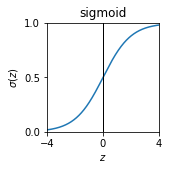

In [7]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-4, 4, 801)
y = 1 / (1 + np.exp(-z))

plt.figure(figsize=(2,2))
plt.title('sigmoid')
plt.plot(z,y)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma(z)$')
plt.xlim(-4, 4)
plt.ylim( 0, 1)
plt.xticks([-4,0,4])
plt.yticks([0,.5,1])
plt.show()

#### Loss Function ($L$)

Given
$
\mathcal D = \{
    (\mathbf x^{(1)}, y^{(1)}),
    (\mathbf x^{(2)}, y^{(2)}),
    \cdots,
    (\mathbf x^{(m)}, y^{(m)})
\}
$, want $\hat y^{(i)} \approx y^{(i)}$.

MSE\
$\mathcal L(\hat y, y) = (y - \hat y)^2$

Cross-entropy\
$\mathcal L(\hat y, y) = -[y \log(\hat y) + (1-y) \log(1-\hat y)]$

#### Cost Function ($J$) (which is an average of $L$)

$J(\theta) = J(\mathbf w, b) = \dfrac{1}{m} \sum \limits_{i=1}^{m} \mathcal L(\hat y^{(i)}, y^{(i)})$

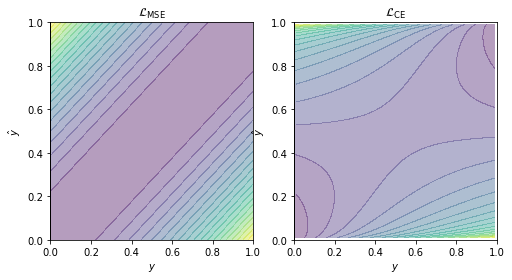

In [8]:
import matplotlib.pyplot as plt
import numpy as np

l = np.linspace(0, 1, 101)
y_mesh, y_hat_mesh = np.meshgrid(l, l)
L = (y_mesh - y_hat_mesh)**2

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title(r'$\mathcal{L}_{\mathrm{MSE}}$')
plt.contourf(y_mesh, y_hat_mesh, L, levels=20, alpha=.4)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.xlim(0,1)
plt.ylim(0,1)

e = 1e-2
l = np.linspace(0+e, 1-e, 101)
y_mesh, y_hat_mesh = np.meshgrid(l, l)
L = -(y_mesh * np.log(y_hat_mesh) + (1-y_mesh)*np.log(1-y_hat_mesh))

plt.subplot(1,2,2)
plt.title(r'$\mathcal{L}_{\mathrm{CE}}$')
plt.contourf(y_mesh, y_hat_mesh, L, levels=20, alpha=.4)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#### Cross-entropy

$\mathcal L(\hat y, y) = -[y \log(\hat y) + (1-y) \log(1-\hat y)]$

$\mathcal L(\hat y, y)$ is a weighted average of $-\log(\hat y)$ and $-\log(1 - \hat y)$ by $y$ and $1-y$

$\hat y = \sigma(z)$

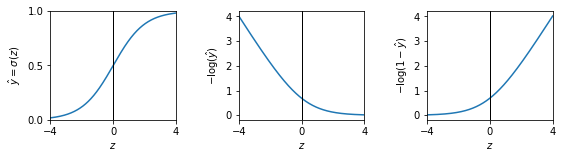

In [9]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-4, 4, 801)
y_hat = 1 / (1 + np.exp(-z))

plt.figure(figsize=(9, 2))
plt.subplots_adjust(wspace=.5)

plt.subplot(1,3,1)
plt.plot(z, y_hat)
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\hat y = \sigma(z)$')
plt.xlim(-4, 4)
plt.ylim( 0, 1)
plt.xticks([-4,0,4])
plt.yticks([0,.5,1])

plt.subplot(1,3,2)
plt.plot(z, -np.log(y_hat))
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$-\mathrm{log} (\hat y)$')
plt.xlim(-4, 4)
plt.xticks([-4,0,4])

plt.subplot(1,3,3)
plt.plot(z, -np.log(1-y_hat))
plt.axvline(0, c='k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$-\mathrm{log} (1- \hat y)$')
plt.xlim(-4, 4)
plt.xticks([-4,0,4])
plt.show()

### Derivatives

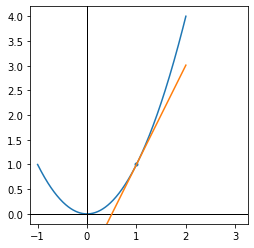

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 2, 301)
y = x**2

i = np.where(1.0 <= x)[0][0]
dy = y[i+1] - y[i]
dx = x[i+1] - x[i]

plt.plot(x, y)
plt.axvline(0, lw=1, c='k')
plt.axhline(0, lw=1, c='k')
plt.axis('square')
plt.scatter(x[i], y[i], marker='.')
plt.plot([x[i]-100*dx, x[i]+100*dx], [y[i]-100*dy, y[i]+100*dy])
plt.show()

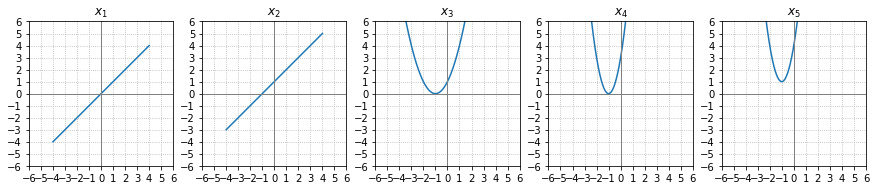

In [11]:
import torch

l = np.linspace(-4, 4, 401)
x1 = l
x2 = x1 + 1
x3 = x2**2
x4 = 3*x3
x5 = x4 + 1
plt.figure(figsize=(15,3))
for i, f in enumerate([x1,x2,x3,x4,x5], start=1):
    plt.subplot(1,5,i)
    plt.title(f"$x_{i}$")
    plt.plot(l, f)
    plt.axvline(0, lw=1, c='grey')
    plt.axhline(0, lw=1, c='grey')
    plt.xticks(range(-6, 7, 1))
    plt.yticks(range(-6, 7, 1))
    plt.grid(ls=':')
    plt.axis('square')
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
plt.show()

$$
x        \quad \longrightarrow \quad
x+1      \quad \longrightarrow \quad
(x+1)^2  \quad \longrightarrow \quad
3(x+1)^2 \quad \longrightarrow \quad
3(x+1)^2+1
$$

<!-- $$
\frac{\partial{3(x+1)^2+1}}{\partial{x}} = 6x+6
$$ -->

$$
\frac{\partial{x_5}}{\partial{x_1}}=

\frac{\partial{x_5}}{\partial{x_4}}
\frac{\partial{x_4}}{\partial{x_3}}
\frac{\partial{x_3}}{\partial{x_2}}
\frac{\partial{x_2}}{\partial{x_1}}=

\frac{\partial{3(x+1)^2+1}}{\partial{3(x+1)^2}}
\frac{\partial{3(x+1)^2}}{\partial{(x+1)^2}}
\frac{\partial{(x+1)^2}}{\partial{(x+1)}}
\frac{\partial{(x+1)}}{\partial{x}}=

1 \cdot 3 \cdot 2(x+1) \cdot 1=

6x+6
$$

$$
\begin{align}
    \sigma(x) &= \frac{1}{1+e^{-x}}\\

    \frac{\mathrm d}{\mathrm d x} \sigma(x) &= \frac{\mathrm d}{\mathrm d x} (1+e^{-x})^{-1} \\
    &= -(1+e^{-x})^{-2} \cdot (-e^{-x}) \\
    &= \frac{1}{1+e^{-x}} \frac{e^{-x}}{1+e^{-x}} \\
    &= \frac{1}{1+e^{-x}} \left(\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}} \right) \\
    &= \frac{1}{1+e^{-x}} \left(1 - \frac{1}{1+e^{-x}} \right) \\
    &= \sigma(x)(1-\sigma(x))
\end{align}
$$

$$
\begin{align}
    \mathcal L_{\mathrm{BCE}} &= -[y \log(\hat y) + (1-y) \log(1-\hat y)]\\
    
    \frac{\mathrm d}{\mathrm d \hat y} \mathcal L_{BCE} &= -\left(\frac{y}{\hat y} - \frac{1-y}{1-\hat y}\right) \\
    &= \frac{\hat y - y}{\hat y (1-\hat y)}

\end{align}
$$

$$
\begin{align}
    \frac{\mathrm d \mathcal L_{BCE}}{\mathrm d x}
    =
    \frac{\mathrm d \mathcal L_{BCE}}{\mathrm d \sigma(x)}
    \frac{\mathrm d \sigma(x)}{\mathrm d x}
    =
    \frac{\mathrm d \mathcal L_{BCE}}{\mathrm d \hat y}
    \frac{\mathrm d \hat y}{\mathrm d x}
    =
    \frac{\hat y - y}{\hat y (1-\hat y)} \hat y (1-\hat y) = \hat y - y
\end{align}
$$

$x$ as a single data with a single feature

$$
\begin{align}
    z &= wx + b \\
    a &= \sigma(z) = \frac{1}{1+e^{-z}} \\
    L &= -(y \log a + (1-y) \log(1-a))\\
\end{align}
$$

$$
\begin{align}
    \frac{\mathrm d L}{\mathrm d w} &=
    \frac{\mathrm d L}{\mathrm d a}
    \frac{\mathrm d a}{\mathrm d z}
    \frac{\mathrm d z}{\mathrm d w}\\
    &= (a-y) \frac{\mathrm d z}{\mathrm d w}\\
    &= (a-y) x
\end{align}
$$

$$
\begin{align}
    \frac{\mathrm d L}{\mathrm d b} &=
    \frac{\mathrm d L}{\mathrm d a}
    \frac{\mathrm d a}{\mathrm d z}
    \frac{\mathrm d z}{\mathrm d b}\\
    &= (a-y) \frac{\mathrm d z}{\mathrm d b}\\
    &= (a-y)
\end{align}
$$

$\mathbf x$ as a single data with `n` features

$$
\mathbf x =
\begin{bmatrix}
    x^{(1)}\\
    x^{(2)}\\
    \vdots \\
    x^{(n)}\\
\end{bmatrix}
$$

$$
\begin{align}
    z &= \mathbf w \cdot \mathbf x + b \\
      &= \mathbf w_{n \times 1}^\intercal \mathbf x_{n \times 1} + b \\
      &= (w^{(1)}x^{(1)} + w^{(1)}x^{(1)} + \cdots + w^{(n)}x^{(n)}) + b \\
    a &= \sigma(z) = \frac{1}{1+e^{-z}} \\
    L &= -(y \log a + (1-y) \log(1-a))\\
\end{align}
$$

$$
\begin{align}
    \frac{\partial L}{\partial w^{(i)}} &=
    \frac{\partial L}{\partial a}
    \frac{\partial a}{\partial z}
    \frac{\partial z}{\partial w^{(i)}}\\
    &= (a-y) \frac{\partial z}{\partial w^{(i)}}\\
    &= (a-y) x^{(i)}
\end{align}
$$

$$
\begin{align}
    \frac{\partial L}{\partial b} &=
    \frac{\partial L}{\partial a}
    \frac{\partial a}{\partial z}
    \frac{\partial z}{\partial b}\\
    &= (a-y) \frac{\partial z}{\partial b}\\
    &= (a-y)
\end{align}
$$

$$
\begin{align}
    \frac{\partial L}{\partial \mathbf w} &=
    \frac{\partial L}{\partial a}
    \frac{\partial a}{\partial z}
    \frac{\partial z}{\partial \mathbf w}\\
    &= (a-y) \frac{\partial z}{\partial \mathbf w}\\
    &= (a-y) \mathbf x
\end{align}
$$

$$
\begin{align}
    \frac{\partial L}{\partial b} &=
    \frac{\partial L}{\partial a}
    \frac{\partial a}{\partial z}
    \frac{\partial z}{\partial b}\\
    &= (a-y) \frac{\partial z}{\partial b}\\
    &= (a-y)
\end{align}
$$

outcome of a sigmoid $\sigma(z)$ is interpreted as `a` or `y_hat` below (which stands for value post-activation)

In [110]:
import numpy as np

z = np.random.random()
a = y_hat = np.exp(z) / (1 + np.exp(z)) # same as 1 / (1 + np.exp(-z))
y = np.random.randint(0, 2)

print(f"{a  = }")
print(f"{y  = }")

dz = a - y
print(f"{dz = }") # this is a value of dL/dz

a  = 0.5934247928044599
y  = 0
dz = 0.5934247928044599


In [112]:
m = 5 # data size

A = np.random.random((1, m))
Y = np.random.randint(0, 2, (1, m))
print(f"{A  = }")
print(f"{Y  = }")

dZ = A - Y
print(f"{dZ = }") # this is a value of dL/dz

A  = array([[0.39562484, 0.8681066 , 0.64578442, 0.37725492, 0.70163249]])
Y  = array([[1, 0, 0, 0, 0]])
dZ = array([[-0.60437516,  0.8681066 ,  0.64578442,  0.37725492,  0.70163249]])


### Vectorization

In [ ]:
import numpy as np

x = np.random.randn(5)
print(f"{x.shape = }")

# this vector x is not a row or column vector. this is a rank 1 array.
# we need a shape of (1,5) or (5,1) to represent a row and column vectors.

x = np.random.randn(1, 5)
print(f"row vector {x.shape = }")

x = np.random.randn(5, 1)
print(f"column vector {x.shape = }")

x.shape = (5,)
row vector x.shape = (1, 5)
column vector x.shape = (5, 1)
